In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


# Load

In [2]:
profiles = pd.read_json('../data/raw/profile.json')
offers = pd.read_json('../data/raw/offers.json')
transactions = pd.read_json('../data/raw/transactions.json')

# Pre processing

In [4]:
# Profiles
profiles['registered_on'] = pd.to_datetime(profiles['registered_on'], format='%Y%m%d')
today = pd.Timestamp('2018-07-27')

profiles['days_since_register'] = (
    today - pd.to_datetime(profiles['registered_on'])
).dt.days.clip(lower=0).astype('Int64')
profiles['months_since_register'] = profiles['days_since_register'] / 30

# Offers
offers['category'] = offers.index

# Transactions
for idx, item in transactions.iterrows():
    value_dict = item.value
    item.value['offer_id'] = value_dict['offer_id'] if value_dict['offer_id'] else value_dict['offer id']
    item.value.pop('offer id', None)

expanded = pd.DataFrame(transactions['value'].tolist())
transactions = pd.concat([transactions, expanded], axis=1)
transactions = transactions.drop('value', axis=1)


# Profiles

- age (int): idade do cliente na criação da conta
- registeredon (int): data de criação da conta
- gender (string): gênero do cliente
- id (string): id do cliente
- credit_card_limit (float): limite do cartão registrado

**Perguntas**

- temos quantos usuários únicos?
- qual a distribuição das idades, gênero e limite no cartão?

In [5]:
profiles.head()

,age,registered_on,gender,id,credit_card_limit,days_since_register,months_since_register
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,530,17.666667
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,377,12.566667
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,15,0.5
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,444,14.8
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,357,11.9


In [6]:
duplicate_ids = profiles['id'].duplicated().sum()
if duplicate_ids > 0:
    print(f"There are {duplicate_ids} duplicate IDs in the 'id' column.")
else:
    print("There are no duplicate IDs in the 'id' column.")

print(f'Number of users: {int(profiles.id.count())}')


There are no duplicate IDs in the 'id' column.
Number of users: 17000


### Age

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64


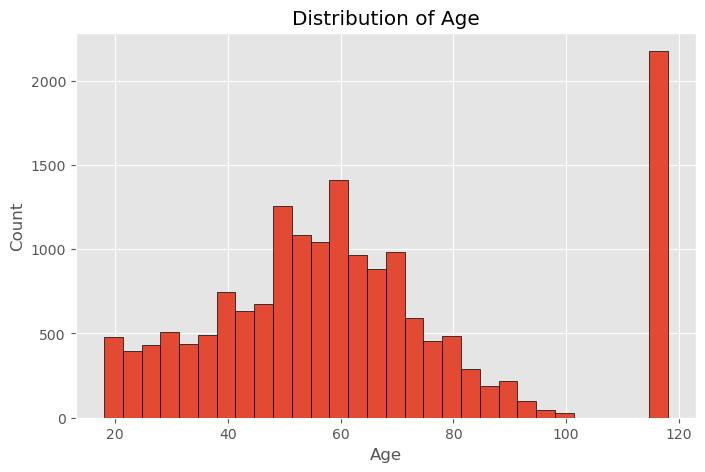

In [7]:
print(profiles.age.describe())

plt.figure(figsize=(8, 5))
profiles['age'].hist(bins=30, edgecolor='black', zorder=3)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

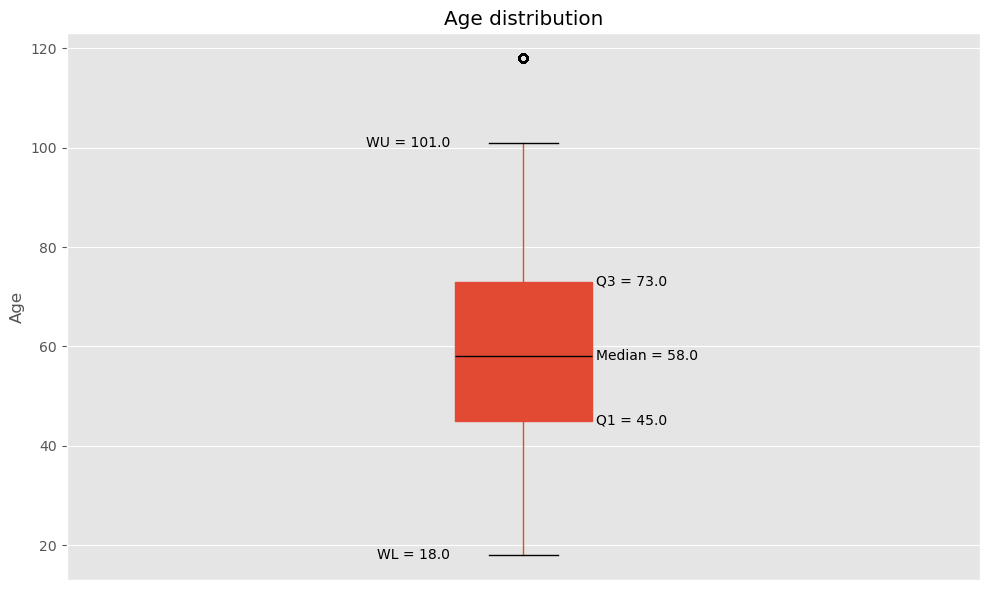

In [8]:
s = profiles['age'].dropna()
q1, med, q3 = s.quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
lower_whisker = s[s >= q1 - 1.5 * iqr].min()
upper_whisker = s[s <= q3 + 1.5 * iqr].max()

fig, ax = plt.subplots(figsize=(10, 6))
profiles.boxplot(
    column='age',
    ax=ax,
    patch_artist=True,
    medianprops=dict(color='black'),
)

x = 1
dx = 0.08

ax.text(x + dx, q1, f"Q1 = {q1:.1f}", va='center')
ax.text(x + dx, med, f"Median = {med:.1f}", va='center')
ax.text(x + dx, q3, f"Q3 = {q3:.1f}", va='center')
ax.text(x - dx, lower_whisker, f"WL = {lower_whisker:.1f}", va='center', ha='right')
ax.text(x - dx, upper_whisker, f"WU = {upper_whisker:.1f}", va='center', ha='right')

plt.title('Age distribution')
plt.xticks([]) 
plt.ylabel('Age')

plt.tight_layout()
plt.show()

### Gender

count     14825
unique        3
top           M
freq       8484
Name: gender, dtype: object


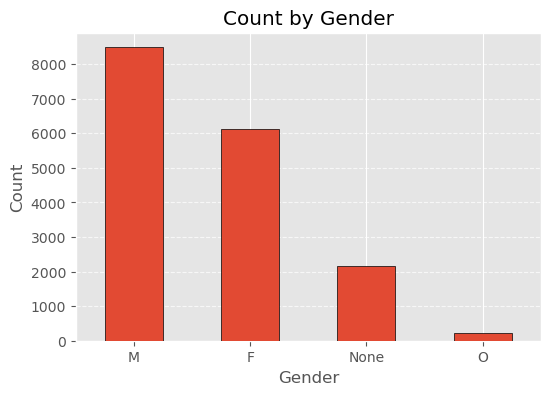

In [9]:
print(profiles.gender.describe())

gender_counts = profiles['gender'].value_counts(dropna=False)
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', edgecolor='black', zorder=3)
plt.title('Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.show()


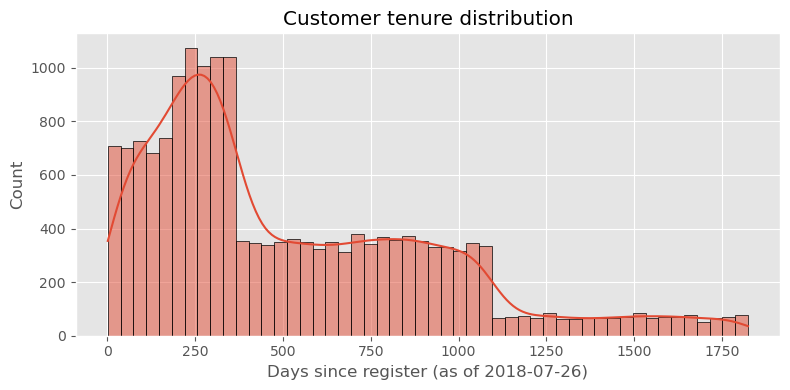

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(profiles['days_since_register'].dropna(), bins=50, edgecolor='k', kde=True)  # add kde=True if you want the density curve
plt.xlabel('Days since register (as of 2018-07-26)')
plt.ylabel('Count')
plt.title('Customer tenure distribution')
plt.tight_layout()
plt.show()

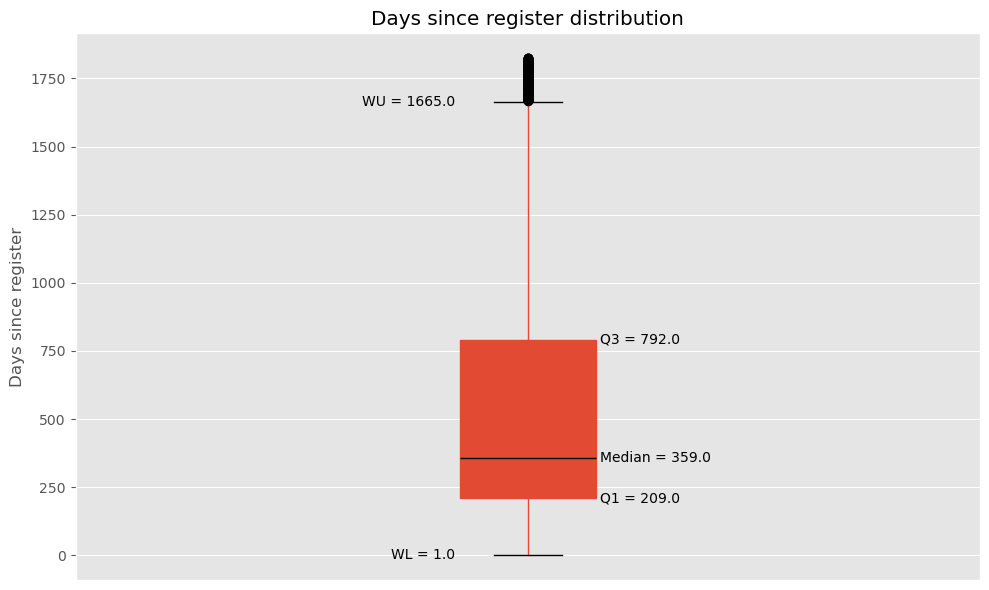

In [11]:
s = profiles['days_since_register'].dropna()
q1, med, q3 = s.quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
lower_whisker = s[s >= q1 - 1.5 * iqr].min()
upper_whisker = s[s <= q3 + 1.5 * iqr].max()

fig, ax = plt.subplots(figsize=(10, 6))
profiles.boxplot(
    column='days_since_register',
    ax=ax,
    patch_artist=True,
    medianprops=dict(color='black'),
)

x = 1
dx = 0.08

ax.text(x + dx, q1, f"Q1 = {q1:.1f}", va='center')
ax.text(x + dx, med, f"Median = {med:.1f}", va='center')
ax.text(x + dx, q3, f"Q3 = {q3:.1f}", va='center')
ax.text(x - dx, lower_whisker, f"WL = {lower_whisker:.1f}", va='center', ha='right')
ax.text(x - dx, upper_whisker, f"WU = {upper_whisker:.1f}", va='center', ha='right')

plt.title('Days since register distribution')
plt.xticks([]) 
plt.ylabel('Days since register')

plt.tight_layout()
plt.show()

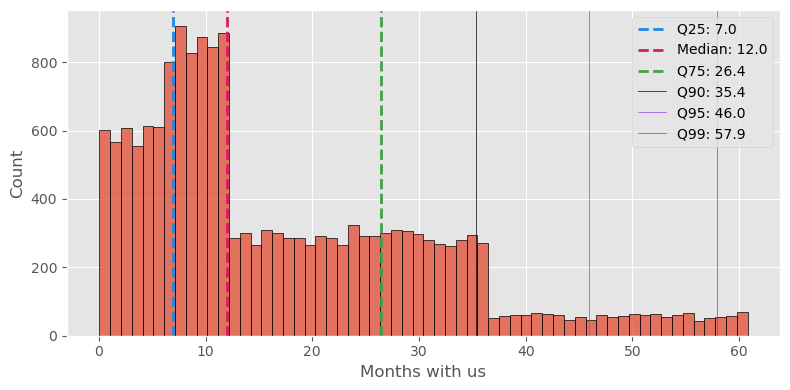

In [12]:
s = profiles['months_since_register']

fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(s, bins=60, edgecolor='k', ax=ax)

q25, med, q75, q90, q95, q99 = s.quantile([0.25, 0.5, 0.75, .9, .95, .99])

for x, label, color in [
    (q25, 'Q25', '#1e88e5'),
    (med,  'Median', '#d81b60'),
    (q75, 'Q75', '#43a047'),
]:
    ax.axvline(x, color=color, linestyle='--', linewidth=2, label=f'{label}: {x:.1f}')

for x, label, color in [
    (q90, 'Q90', '#000000'),
    (q95, 'Q95', '#9542f5'),
    (q99, 'Q99', '#4257f5'),
]:
    ax.axvline(x, color=color, linestyle='-', linewidth=.5, label=f'{label}: {x:.1f}')

ax.legend()
ax.set_xlabel('Months with us')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [15]:
profiles['is_new_customer'] = (profiles['months_since_register'] <= 8)
profiles['is_continuous_customer'] = ((profiles['months_since_register'] > 8) & (profiles['months_since_register'] <= 12))
profiles['is_tenured_customer'] = ((profiles['months_since_register'] > 12) & (profiles['months_since_register'] <= 26))
profiles['is_high_tenured_customer'] = ((profiles['months_since_register'] > 26) & (profiles['months_since_register'] <= 46))
profiles['is_extreme_tenured_customer'] = ((profiles['months_since_register'] > 46) & (profiles['months_since_register'] <= 57))

# Offers

- id (string): id da oferta
- offer_type (string): o tipo da oferta (BOGO, discount, informational)
- min_value (int): valor mínimo para ativação da oferta
- duration (int): duração da oferta
- discount_value (int): valor do desconto
- channels (list of strings): canais de veiculação


**Notas**
- Assumindo duration como dias

**Perguntas preliminares**

- temos quantas ofertas?
- quais os canais de distribuição?
- qual a distribuição das ofertas?
- qual o maior/menor desconto?

In [117]:
offers.head()

,channels,min_value,duration,id,offer_type,discount_value,has_email,has_mobile,has_social,has_web,category
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,True,True,True,False,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,True,True,True,True,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,True,True,False,True,2
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,True,True,False,True,3
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,True,False,False,True,4


In [17]:
duplicate_ids = offers['id'].duplicated().sum()
if duplicate_ids > 0:
    print(f"There are {duplicate_ids} duplicate IDs in the 'id' column.")
else:
    print("There are no duplicate IDs in the 'id' column.")

print(f'Number of offers: {int(offers.id.count())}')

There are no duplicate IDs in the 'id' column.
Number of offers: 10


In [18]:
offers

,channels,min_value,duration,id,offer_type,discount_value
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [19]:
offers.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [20]:
category_names = offers['channels'].explode().dropna().unique().tolist()
category_names

['email', 'mobile', 'social', 'web']

In [21]:
offers['channels'].explode().value_counts()

channels
email     10
mobile     9
web        8
social     6
Name: count, dtype: int64

In [22]:
dummies = (
    pd.get_dummies(offers['channels'].explode())
      .groupby(level=0).max()
      .reindex(offers.index, fill_value=0)
      .reindex(columns=category_names, fill_value=0)
)

offers = offers.join(dummies.add_prefix('has_'))

In [23]:
offers.discount_value.describe()

count    10.000000
mean      4.200000
std       3.583915
min       0.000000
25%       2.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: discount_value, dtype: float64

# Transactions

- event (str): descrição do evento (transação, oferta recebida, etc.)
- account_id (str): id do cliente
- time_since_test_start (int): tempo desde o começo do teste em dias (t=0)
- value (json): registra offer_id, desconto (reward) ou valor da transação

**Perguntas preliminares**




In [24]:
transactions.head()

,event,account_id,time_since_test_start,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [25]:
transactions.event.value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [124]:
transactions.time_since_test_start.describe()

count    306534.000000
mean         15.265956
std           8.346930
min           0.000000
25%           7.750000
50%          17.000000
75%          22.000000
max          29.750000
Name: time_since_test_start, dtype: float64

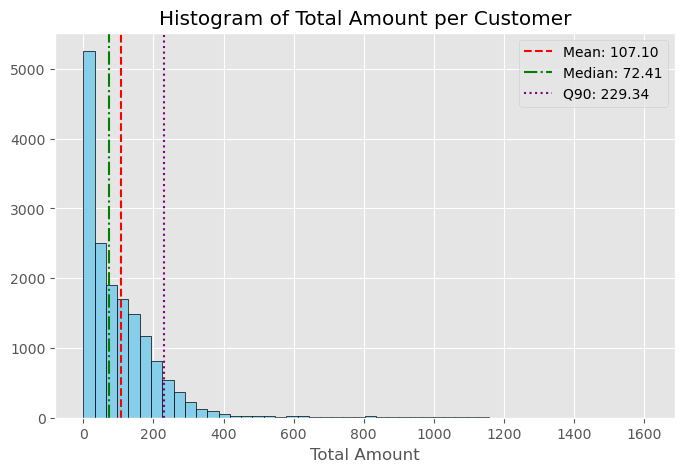

In [ ]:
amount_sum = (
    transactions[transactions.event == 'transaction'].groupby(['account_id'])['amount']
    .sum()
    .reset_index(name='total_amount')
)

plt.figure(figsize=(8, 5))
plt.hist(amount_sum['total_amount'], bins=50, color='skyblue', edgecolor='black')
mean_val = amount_sum['total_amount'].mean()
median_val = amount_sum['total_amount'].median()
q90_val = amount_sum['total_amount'].quantile(0.9)

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.axvline(q90_val, color='purple', linestyle=':', label=f'Q90: {q90_val:.2f}')

plt.xlabel('Total Amount')
plt.ylabel('Number of Customers')
plt.title('Histogram of Total Amount per Customer')
plt.legend()
plt.show()


# Processing

In [26]:
data = transactions.merge(
    profiles.add_prefix('profile_'), left_on='account_id', right_on='profile_id', how='left'
).merge(
    offers.add_prefix('offer_'), left_on='offer_id', right_on='offer_id', how='left',
)
data.head()


,event,account_id,time_since_test_start,amount,offer_id,reward,profile_age,profile_registered_on,profile_gender,profile_id,profile_credit_card_limit,profile_days_since_register,profile_months_since_register,profile_is_new_customer,profile_is_continuous_customer,profile_is_tenured_customer,profile_is_high_tenured_customer,profile_is_extreme_tenured_customer,offer_channels,offer_min_value,offer_duration,offer_offer_type,offer_discount_value,offer_has_email,offer_has_mobile,offer_has_social,offer_has_web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,444,14.8,False,False,True,False,False,"[web, email, mobile]",5.0,7.0,bogo,5.0,True,True,False,True
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,357,11.9,False,True,False,False,False,"[web, email]",20.0,10.0,discount,5.0,True,False,False,True
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,92,3.066667,True,False,False,False,False,"[web, email, mobile]",10.0,7.0,discount,2.0,True,True,False,True
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,118,2017-09-25,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,305,10.166667,False,True,False,False,False,"[web, email, mobile, social]",10.0,10.0,discount,2.0,True,True,True,True
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,118,2017-10-02,None,68617ca6246f4fbc85e91a2a49552598,NaN,298,9.933333,False,True,False,False,False,"[web, email, mobile, social]",10.0,5.0,bogo,10.0,True,True,True,True


In [27]:
data.columns

Index(['event', 'account_id', 'time_since_test_start', 'amount', 'offer_id',
       'reward', 'profile_age', 'profile_registered_on', 'profile_gender',
       'profile_id', 'profile_credit_card_limit',
       'profile_days_since_register', 'profile_months_since_register',
       'profile_is_new_customer', 'profile_is_continuous_customer',
       'profile_is_tenured_customer', 'profile_is_high_tenured_customer',
       'profile_is_extreme_tenured_customer', 'offer_channels',
       'offer_min_value', 'offer_duration', 'offer_offer_type',
       'offer_discount_value', 'offer_has_email', 'offer_has_mobile',
       'offer_has_social', 'offer_has_web'],
      dtype='object')

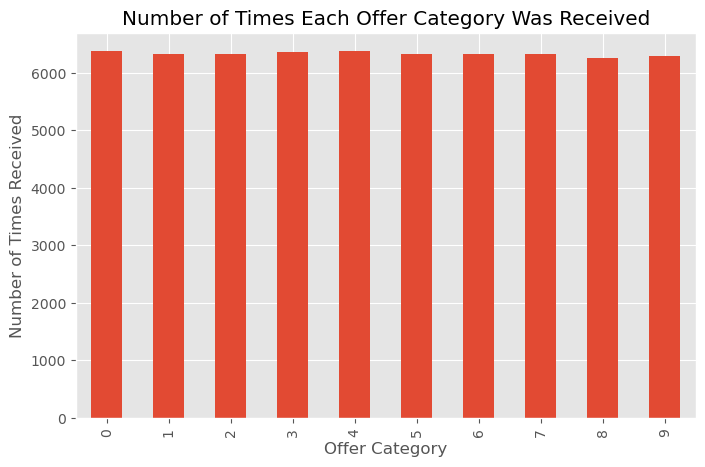

In [ ]:
customer_offers_received = (
    transactions[transactions.event == "offer received"]
    .groupby('account_id')['offer_id']
    .unique()
    .reset_index(name='offers_received')
)

all_offers = customer_offers_received['offers_received'].explode()
offer_counts = all_offers.value_counts()

offer_ids = offer_counts.index
offer_categories = offers.set_index('id').loc[offer_ids, 'category']
category_counts = offer_counts.groupby(offer_categories).sum()

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.xlabel('Offer Category')
plt.ylabel('Number of Times Received')
plt.title('Number of Times Each Offer Category Was Received')
plt.show()

## Feature engineering

In [28]:
# Merge profile + offers with transactions of type "offer received"
offers_received = data[data.event == "offer received"].copy()
offers_completed = transactions[transactions.event == "offer completed"].copy()
offers_completed.rename(columns={'time_since_test_start': 'completion_time'}, inplace=True)

merged = offers_received.merge(offers_completed, on=['account_id', 'offer_id'], how='left')
merged['label'] = (
    (merged['completion_time'] >= merged['time_since_test_start']) &
    (merged['completion_time'] <= merged['time_since_test_start'] + merged['offer_duration'])
).astype(int)



offers_received_labeled = (
    merged.groupby(['account_id', 'offer_id', 'time_since_test_start', 'offer_duration'], as_index=False)
          .agg({'label': 'max'})
)


In [29]:
offers_received_labeled.head()

,account_id,offer_id,time_since_test_start,offer_duration,label
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24.0,7.0,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14.0,4.0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7.0,3.0,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,17.0,5.0,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,21.0,10.0,1


In [30]:
# Step 1: filter transactions
tx = transactions[transactions.event == "transaction"].copy()

daily_tx = tx.groupby(['account_id', 'time_since_test_start'], as_index=False).agg(
    daily_spent=('amount', 'sum'),
    daily_count=('amount', 'count')
)

daily_tx['cum_spent'] = daily_tx.groupby('account_id')['daily_spent'].cumsum()
daily_tx['cum_count'] = daily_tx.groupby('account_id')['daily_count'].cumsum()

# Step 3: join offers_received with cumulative history *up to previous day*
# offers_received = offers_received.copy()
offers_received_w_daily = offers_received.merge(
    daily_tx,
    on=['account_id', 'time_since_test_start'],
    how='left'
)

# Fill missing with 0 (no transactions on that day)
offers_received_w_daily[['daily_spent', 'daily_count', 'cum_spent', 'cum_count']] = \
    offers_received_w_daily[['daily_spent', 'daily_count', 'cum_spent', 'cum_count']].fillna(0)

# Step 4: shift history to avoid leakage (only use before offer day)
offers_received_w_daily['hist_spent'] = offers_received_w_daily['cum_spent'] - offers_received_w_daily['daily_spent']
offers_received_w_daily['hist_count'] = offers_received_w_daily['cum_count'] - offers_received_w_daily['daily_count']

# Optional: drop intermediate columns
# offers_received = offers_received.drop(columns=['daily_spent','daily_count','cum_spent','cum_count'])

offers_received_w_daily.head()


,event,account_id,time_since_test_start,amount,offer_id,reward,profile_age,profile_registered_on,profile_gender,profile_id,profile_credit_card_limit,profile_days_since_register,profile_months_since_register,profile_is_new_customer,profile_is_continuous_customer,profile_is_tenured_customer,profile_is_high_tenured_customer,profile_is_extreme_tenured_customer,offer_channels,offer_min_value,offer_duration,offer_offer_type,offer_discount_value,offer_has_email,offer_has_mobile,offer_has_social,offer_has_web,daily_spent,daily_count,cum_spent,cum_count,hist_spent,hist_count
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,444,14.8,False,False,True,False,False,"[web, email, mobile]",5.0,7.0,bogo,5.0,True,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,357,11.9,False,True,False,False,False,"[web, email]",20.0,10.0,discount,5.0,True,False,False,True,0.0,0.0,0.0,0.0,0.0,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,92,3.066667,True,False,False,False,False,"[web, email, mobile]",10.0,7.0,discount,2.0,True,True,False,True,0.0,0.0,0.0,0.0,0.0,0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,118,2017-09-25,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,305,10.166667,False,True,False,False,False,"[web, email, mobile, social]",10.0,10.0,discount,2.0,True,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,118,2017-10-02,None,68617ca6246f4fbc85e91a2a49552598,NaN,298,9.933333,False,True,False,False,False,"[web, email, mobile, social]",10.0,5.0,bogo,10.0,True,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
dataset = offers_received_labeled.merge(
    offers_received_w_daily[
        ['account_id', 'offer_id', 'time_since_test_start', 'hist_spent', 'hist_count']
    ],
    on=['account_id', 'offer_id', 'time_since_test_start'],
    how='left'
)

In [32]:
dataset.head()

,account_id,offer_id,time_since_test_start,offer_duration,label,hist_spent,hist_count
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24.0,7.0,1,58.4,4.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14.0,4.0,0,0.0,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7.0,3.0,0,0.0,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,17.0,5.0,1,0.0,0.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,21.0,10.0,1,0.0,0.0


In [33]:
dataset = dataset.merge(
    offers[['duration', 'min_value', 'offer_type', 'discount_value', 'has_email', 'has_mobile', 'has_social', 'has_web', 'id']],
    left_on='offer_id',
    right_on='id',
    how='left'
)

In [35]:
dataset = dataset.merge(
    profiles[[
        'age', 
        'gender', 
        'months_since_register', 
        'is_new_customer', 
        'is_continuous_customer', 
        'is_tenured_customer', 
        'is_high_tenured_customer', 
        'is_extreme_tenured_customer',
        'credit_card_limit',
        'id'
    ]],
    left_on='account_id',
    right_on='id',
    how='left'
)

In [36]:
dataset.head()

,account_id,offer_id,time_since_test_start,offer_duration,label,hist_spent,hist_count,duration,min_value,offer_type,discount_value,has_email,has_mobile,has_social,has_web,id_x,age,gender,months_since_register,is_new_customer,is_continuous_customer,is_tenured_customer,is_high_tenured_customer,is_extreme_tenured_customer,credit_card_limit,id_y
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24.0,7.0,1,58.4,4.0,7,10,discount,2,True,True,False,True,2906b810c7d4411798c6938adc9daaa5,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14.0,4.0,0,0.0,0.0,4,0,informational,0,True,True,False,True,3f207df678b143eea3cee63160fa8bed,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7.0,3.0,0,0.0,0.0,3,0,informational,0,True,True,True,False,5a8bc65990b245e5a138643cd4eb9837,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,17.0,5.0,1,0.0,0.0,5,5,bogo,5,True,True,True,True,f19421c1d4aa40978ebb69ca19b0e20d,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,21.0,10.0,1,0.0,0.0,10,10,discount,2,True,True,True,True,fafdcd668e3743c1bb461111dcafc2a4,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f


In [37]:
daily_tx = tx.groupby(['account_id', 'time_since_test_start'], as_index=False).agg(
    daily_spent=('amount', 'sum'),
    daily_count=('amount', 'count')
).sort_values(['account_id', 'time_since_test_start'])

# Rolling window: 30 days prior to each day, excluding current day
daily_tx['rolling_spent_30d'] = daily_tx.groupby('account_id')['daily_spent'].transform(
    lambda x: x.shift(1).rolling(window=30, min_periods=1).sum()
)
daily_tx['rolling_count_30d'] = daily_tx.groupby('account_id')['daily_count'].transform(
    lambda x: x.shift(1).rolling(window=30, min_periods=1).sum()
)

dataset = dataset.merge(
    daily_tx[['account_id', 'time_since_test_start', 'rolling_spent_30d', 'rolling_count_30d']],
    on=['account_id', 'time_since_test_start'], how='left'
)

dataset[['rolling_spent_30d', 'rolling_count_30d']] = dataset[['rolling_spent_30d', 'rolling_count_30d']].fillna(0)

In [38]:
dataset.head()

,account_id,offer_id,time_since_test_start,offer_duration,label,hist_spent,hist_count,duration,min_value,offer_type,discount_value,has_email,has_mobile,has_social,has_web,id_x,age,gender,months_since_register,is_new_customer,is_continuous_customer,is_tenured_customer,is_high_tenured_customer,is_extreme_tenured_customer,credit_card_limit,id_y,rolling_spent_30d,rolling_count_30d
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24.0,7.0,1,58.4,4.0,7,10,discount,2,True,True,False,True,2906b810c7d4411798c6938adc9daaa5,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,58.4,4.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14.0,4.0,0,0.0,0.0,4,0,informational,0,True,True,False,True,3f207df678b143eea3cee63160fa8bed,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,0.0,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7.0,3.0,0,0.0,0.0,3,0,informational,0,True,True,True,False,5a8bc65990b245e5a138643cd4eb9837,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,0.0,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,17.0,5.0,1,0.0,0.0,5,5,bogo,5,True,True,True,True,f19421c1d4aa40978ebb69ca19b0e20d,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,0.0,0.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,21.0,10.0,1,0.0,0.0,10,10,discount,2,True,True,True,True,fafdcd668e3743c1bb461111dcafc2a4,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,0.0,0.0


In [39]:
offers_received_all = data[data.event == "offer received"].copy()
offers_completed_all = data[data.event == "offer completed"].copy()


# Count total offers received per customer up to each offer_received time
offers_received_all = offers_received_all.sort_values(['account_id', 'time_since_test_start'])
offers_received_all['offer_count'] = 1
offers_received_all['cum_offers_received'] = offers_received_all.groupby('account_id')['offer_count'].cumsum()

# For each completion, mark the time
offers_completed_all = offers_completed_all[['account_id', 'offer_id', 'time_since_test_start']]
offers_completed_all = offers_completed_all.rename(columns={'time_since_test_start': 'completion_time'})

# Join completions back to offers_received_all on customer and offer_id to find if completed before current offer_received time
offers_received_all = offers_received_all.merge(
    offers_completed_all,
    on=['account_id', 'offer_id'],
    how='left'
)

# Completed if completion_time < current offer_received time
offers_received_all['completed_before'] = (
    (offers_received_all['completion_time'].notna()) &
    (offers_received_all['completion_time'] < offers_received_all['time_since_test_start'])
).astype(int)

# Cumulative sum of completed offers before current offer_received time
offers_received_all['cum_completed_before'] = offers_received_all.groupby('account_id')['completed_before'].cumsum()

# Calculate completion rate excluding current offer (use cum counts shifted by 1)
offers_received_all['hist_offer_completion_rate'] = (
    (offers_received_all['cum_completed_before'] - offers_received_all['completed_before']) /
    (offers_received_all['cum_offers_received'] - 1).replace(0, 1)
)

# Keep relevant columns
hist_completion = offers_received_all[['account_id', 'offer_id', 'time_since_test_start', 'hist_offer_completion_rate']]

In [40]:
dataset = dataset.merge(hist_completion, on=['account_id', 'offer_id', 'time_since_test_start'], how='left')
dataset['hist_offer_completion_rate'] = dataset['hist_offer_completion_rate'].fillna(0)

In [41]:
dataset.head()

,account_id,offer_id,time_since_test_start,offer_duration,label,hist_spent,hist_count,duration,min_value,offer_type,discount_value,has_email,has_mobile,has_social,has_web,id_x,age,gender,months_since_register,is_new_customer,is_continuous_customer,is_tenured_customer,is_high_tenured_customer,is_extreme_tenured_customer,credit_card_limit,id_y,rolling_spent_30d,rolling_count_30d,hist_offer_completion_rate
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,24.0,7.0,1,58.4,4.0,7,10,discount,2,True,True,False,True,2906b810c7d4411798c6938adc9daaa5,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,58.4,4.0,0.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,14.0,4.0,0,0.0,0.0,4,0,informational,0,True,True,False,True,3f207df678b143eea3cee63160fa8bed,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,0.0,0.0,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,7.0,3.0,0,0.0,0.0,3,0,informational,0,True,True,True,False,5a8bc65990b245e5a138643cd4eb9837,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,0.0,0.0,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,17.0,5.0,1,0.0,0.0,5,5,bogo,5,True,True,True,True,f19421c1d4aa40978ebb69ca19b0e20d,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,0.0,0.0,0.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,21.0,10.0,1,0.0,0.0,10,10,discount,2,True,True,True,True,fafdcd668e3743c1bb461111dcafc2a4,33,M,15.4,False,False,True,False,False,72000.0,0009655768c64bdeb2e877511632db8f,0.0,0.0,0.0


# Training

In [42]:
split_day = int(dataset['time_since_test_start'].quantile(0.8))
split_day

21

In [43]:
train = dataset[dataset['time_since_test_start'] <= split_day]
test = dataset[dataset['time_since_test_start'] > split_day]

In [44]:
train.columns

Index(['account_id', 'offer_id', 'time_since_test_start', 'offer_duration',
       'label', 'hist_spent', 'hist_count', 'duration', 'min_value',
       'offer_type', 'discount_value', 'has_email', 'has_mobile', 'has_social',
       'has_web', 'id_x', 'age', 'gender', 'months_since_register',
       'is_new_customer', 'is_continuous_customer', 'is_tenured_customer',
       'is_high_tenured_customer', 'is_extreme_tenured_customer',
       'credit_card_limit', 'id_y', 'rolling_spent_30d', 'rolling_count_30d',
       'hist_offer_completion_rate'],
      dtype='object')

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

features = [
    'age', 'months_since_register', 'credit_card_limit',
    'is_new_customer', 'is_continuous_customer', 'is_tenured_customer', 'is_high_tenured_customer', 'is_extreme_tenured_customer',
    'has_email', 'has_mobile', 'has_social', 'has_web',
    'hist_spent', 'hist_count', 'rolling_spent_30d', 'rolling_count_30d', 'hist_offer_completion_rate',
    'discount_value', 'min_value', 'duration',
]

# Add categorical features from offers & profiles
cat_features = ['offer_type', 'gender']  # adjust based on your data

X_train = train[features + cat_features]
y_train = train['label']
X_test = test[features + cat_features]
y_test = test['label']


In [47]:
X_train.head()

,age,months_since_register,credit_card_limit,is_new_customer,is_continuous_customer,is_tenured_customer,is_high_tenured_customer,is_extreme_tenured_customer,has_email,has_mobile,has_social,has_web,hist_spent,hist_count,rolling_spent_30d,rolling_count_30d,hist_offer_completion_rate,discount_value,min_value,duration,offer_type,gender
1,33,15.4,72000.0,False,False,True,False,False,True,True,False,True,0.0,0.0,0.0,0.0,0.0,0,0,4,informational,M
2,33,15.4,72000.0,False,False,True,False,False,True,True,True,False,0.0,0.0,0.0,0.0,0.0,0,0,3,informational,M
3,33,15.4,72000.0,False,False,True,False,False,True,True,True,True,0.0,0.0,0.0,0.0,0.0,5,5,5,bogo,M
4,33,15.4,72000.0,False,False,True,False,False,True,True,True,True,0.0,0.0,0.0,0.0,0.0,2,10,10,discount,M
5,118,3.1,NaN,True,False,False,False,False,True,True,True,True,0.0,0.0,0.0,0.0,0.0,5,5,5,bogo,None


In [48]:

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_features)
], remainder='passthrough')

clf = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

clf.fit(X_train, y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Evaluation

In [67]:
X_test.head()

,age,months_since_register,credit_card_limit,is_new_customer,is_continuous_customer,is_tenured_customer,is_high_tenured_customer,is_extreme_tenured_customer,has_email,has_mobile,has_social,has_web,hist_spent,hist_count,rolling_spent_30d,rolling_count_30d,hist_offer_completion_rate,discount_value,min_value,duration,offer_type,gender
0,33,15.4,72000.0,False,False,True,False,False,True,True,False,True,58.40,4.0,58.40,4.0,0.00,2,10,7,discount,M
6,118,3.1,NaN,True,False,False,False,False,True,True,True,True,0.00,0.0,0.00,0.0,0.00,5,5,5,bogo,None
32,19,23.9,65000.0,False,False,True,False,False,True,True,False,True,0.00,0.0,0.00,0.0,0.00,2,10,7,discount,F
37,55,2.666667,74000.0,True,False,False,False,False,True,True,True,True,0.00,0.0,0.00,0.0,0.00,2,10,10,discount,F
45,54,28.266667,99000.0,False,False,False,True,False,True,True,True,True,238.41,8.0,238.41,8.0,0.25,2,10,10,discount,M


In [49]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.85      0.75      0.80      7433
           1       0.76      0.85      0.81      6989

    accuracy                           0.80     14422
   macro avg       0.80      0.80      0.80     14422
weighted avg       0.81      0.80      0.80     14422

ROC AUC: 0.8934230063860226


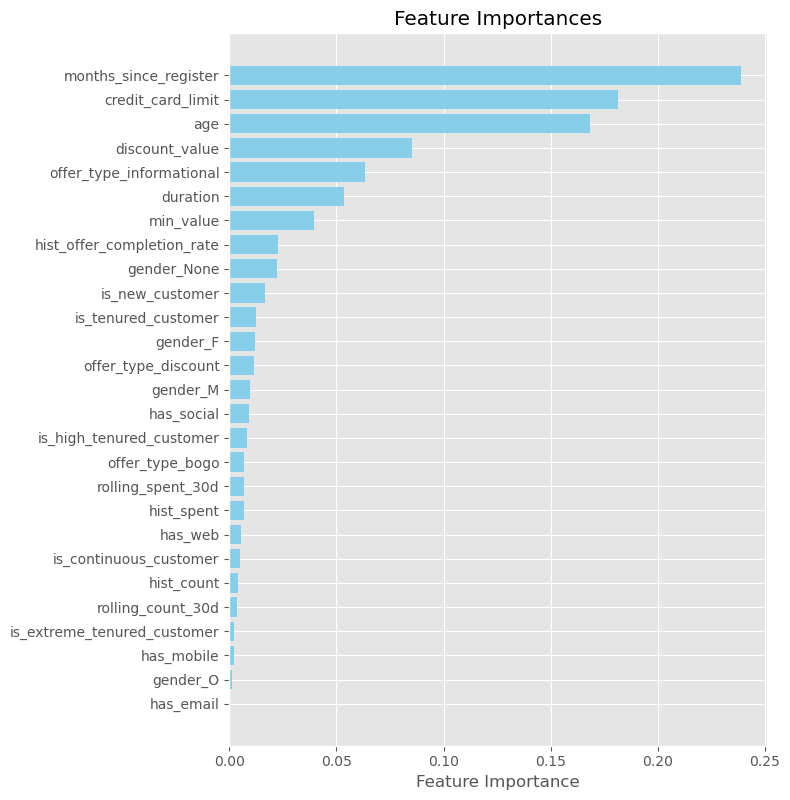

In [50]:
import matplotlib.pyplot as plt
import numpy as np

model = clf.named_steps['model']
encoder = clf.named_steps['prep'].named_transformers_['cat']
cat_names = encoder.get_feature_names_out(cat_features)
all_feature_names = list(cat_names) + features

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, max(4, len(importances)*0.3)))
plt.barh(range(len(importances)), importances[indices], color='skyblue')
plt.yticks(range(len(importances)), [all_feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


# Reporting

In [56]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 1. Classification report as dict
cr_dict = classification_report(y_test, y_pred, output_dict=True)

# Flatten classification metrics for each class + avg
rows = []
for label, metrics in cr_dict.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        # Accuracy is a scalar, others are dicts
        if label == 'accuracy':
            rows.append({'metric': 'accuracy', 'class': '', 'value': metrics})
        else:
            for m, v in metrics.items():
                rows.append({'metric': m, 'class': label, 'value': v})
    else:
        for m, v in metrics.items():
            rows.append({'metric': m, 'class': label, 'value': v})

df_metrics = pd.DataFrame(rows)

# 2. Add ROC AUC as a separate metric row
df_metrics = pd.concat([df_metrics, pd.DataFrame([{
    'metric': 'roc_auc', 'class': '', 'value': roc_auc_score(y_test, y_proba)
}])], ignore_index=True)

# 3. Feature importances
fi_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)


In [57]:
from datetime import datetime

metadata = {
    'model_name': 'RandomForest',
    'run_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'description': 'Baseline Random Forest with historical, rolling features, tenure from customers and credit card limit',
    'features': ','.join(train.columns.to_list())
}

# Prepare classification metrics DataFrame
df_metrics['type'] = 'metric'
df_metrics['model_name'] = metadata['model_name']
df_metrics['run_date'] = metadata['run_date']
df_metrics['description'] = metadata['description']
df_metrics['features'] = metadata['features']

# Prepare feature importances DataFrame
fi_df = fi_df.rename(columns={'feature': 'name', 'importance': 'value'})
fi_df['type'] = 'feature_importance'
fi_df['class'] = ''  # same columns as df_metrics for consistency
fi_df['metric'] = '' # fill empty for columns not relevant to features
fi_df['model_name'] = metadata['model_name']
fi_df['run_date'] = metadata['run_date']
fi_df['description'] = metadata['description']
fi_df['features'] = metadata['features']

# Make columns consistent before concat
cols = ['type', 'metric', 'class', 'name', 'value', 'model_name', 'run_date', 'description', 'features']

# For df_metrics, create 'name' column with metric name for compatibility
df_metrics['name'] = df_metrics['metric']
df_metrics['value'] = df_metrics['value']

# Select and reorder columns
df_metrics_final = df_metrics.rename(columns={'value': 'value'})[cols]
fi_df_final = fi_df[cols]

# Concatenate vertically
combined = pd.concat([df_metrics_final, fi_df_final], ignore_index=True)

import os

today = datetime.now().date()
output_dir = str(today)
os.makedirs(output_dir, exist_ok=True)

# Save to one CSV in the date-partitioned folder
output_path = os.path.join(output_dir, f'model_evaluation_combined_{metadata["run_date"]}.csv')
combined.to_csv(output_path, index=False)



# Testing

In [69]:
# New users

ages = [i for i in range(18, int(profiles.age.max()) + 1)]
gender = 'M'
month_since_register = 0
hist_spent = 0
hist_count = 0
rolling_spent_30d = 0
rolling_count_30d = 0
hist_offer_completion_rate = 0
credit_card_limit = profiles.credit_card_limit.mean()
is_new_customer = True
is_continuous_customer = False
is_tenured_customer = False
is_high_tenured_customer = False
is_extreme_tenured_customer = False

unique_offers = offers[[
    'min_value', 
    'duration',
    'offer_type',
    'discount_value',
    'has_email',
    'has_mobile',
    'has_social',
    'has_web',
]]


In [71]:
unique_offers

,min_value,duration,offer_type,discount_value,has_email,has_mobile,has_social,has_web
0,10,7,bogo,10,True,True,True,False
1,10,5,bogo,10,True,True,True,True
2,0,4,informational,0,True,True,False,True
3,5,7,bogo,5,True,True,False,True
4,20,10,discount,5,True,False,False,True
5,7,7,discount,3,True,True,True,True
6,10,10,discount,2,True,True,True,True
7,0,3,informational,0,True,True,True,False
8,5,5,bogo,5,True,True,True,True
9,10,7,discount,2,True,True,False,True


In [73]:
rows = []
for customer_age in ages:
    for idx, offer in unique_offers.iterrows():
        # print(offer)
        row = {
            'age': customer_age,
            'gender': gender,
            'months_since_register': month_since_register,
            'credit_card_limit': credit_card_limit,
            'is_new_customer': is_new_customer,
            'is_continuous_customer': is_continuous_customer,
            'is_tenured_customer': is_tenured_customer,
            'is_high_tenured_customer': is_high_tenured_customer,
            'is_extreme_tenured_customer': is_extreme_tenured_customer,
            'hist_spent': hist_spent,
            'hist_count': hist_count,
            'rolling_spent_30d': rolling_spent_30d,
            'rolling_count_30d': rolling_count_30d,
            'hist_offer_completion_rate': hist_offer_completion_rate,
            'discount_value': offer['discount_value'],
            'min_value': offer['min_value'],
            'duration': offer['duration'],
            'offer_type': offer['offer_type'],
            'has_email': offer['has_email'],
            'has_mobile': offer['has_mobile'],
            'has_social': offer['has_social'],
            'has_web': offer['has_web'],
        }
        rows.append(row)
new_customers_inference_df = pd.DataFrame(rows)
new_customers_inference_df.head()

,age,gender,months_since_register,credit_card_limit,is_new_customer,is_continuous_customer,is_tenured_customer,is_high_tenured_customer,is_extreme_tenured_customer,hist_spent,hist_count,rolling_spent_30d,rolling_count_30d,hist_offer_completion_rate,discount_value,min_value,duration,offer_type,has_email,has_mobile,has_social,has_web
0,18,M,0,65404.991568,True,False,False,False,False,0,0,0,0,0,10,10,7,bogo,True,True,True,False
1,18,M,0,65404.991568,True,False,False,False,False,0,0,0,0,0,10,10,5,bogo,True,True,True,True
2,18,M,0,65404.991568,True,False,False,False,False,0,0,0,0,0,0,0,4,informational,True,True,False,True
3,18,M,0,65404.991568,True,False,False,False,False,0,0,0,0,0,5,5,7,bogo,True,True,False,True
4,18,M,0,65404.991568,True,False,False,False,False,0,0,0,0,0,5,20,10,discount,True,False,False,True


In [81]:
age_predictions = {}
for age in ages:
    test_inference = new_customers_inference_df[new_customers_inference_df.age == age]
    _preds = clf.predict(test_inference)
    _probs = clf.predict_proba(test_inference)[:, 1]
    age_predictions[age] = {
        'preds': _preds,
        'pred_proba': _probs
    }

In [89]:
offer_related_columns = [
    'min_value', 
    'duration',
    'offer_type',
    'discount_value',
    'has_email',
    'has_mobile',
    'has_social',
    'has_web',
]

for age in ages:
    idxs = np.where(age_predictions[age]['preds'] == 1)[0]
    # _tmp = new_customers_inference_df[new_customers_inference_df.age == age].reset_index()[idxs]
    # _offer_related = _tmp[offer_related_columns]
    age_predictions[age]['offers'] = idxs

In [108]:
youth = 25
youth_list = {}
for age in range(18, youth+1):
    _offers = age_predictions[age]['offers']
    for item in _offers:
        youth_list[int(item)] = youth_list.get(int(item), 0) + 1


adult = 40
adult_list = {}
for age in range(youth+1, adult+1):
    _offers = age_predictions[age]['offers']
    for item in _offers:
        adult_list[int(item)] = adult_list.get(int(item), 0) + 1

senior = 60
senior_list = {}
for age in range(adult+1, senior+1):
    _offers = age_predictions[age]['offers']
    for item in _offers:
        senior_list[int(item)] = senior_list.get(int(item), 0) + 1

elder = 118
elder_list = {}
for age in range(senior+1, elder+1):
    _offers = age_predictions[age]['offers']
    for item in _offers:
        elder_list[int(item)] = elder_list.get(int(item), 0) + 1


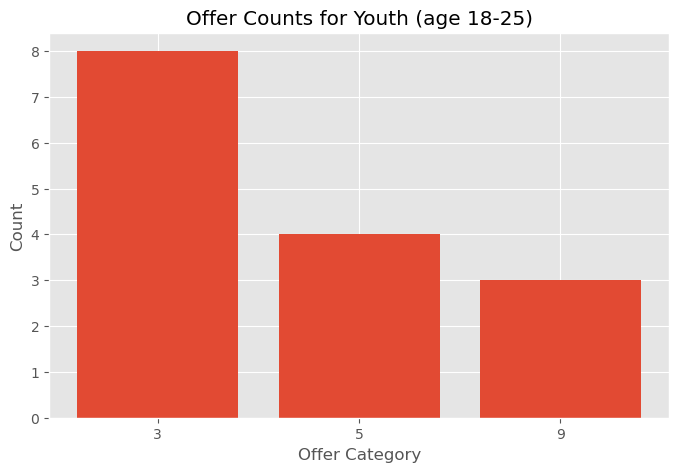

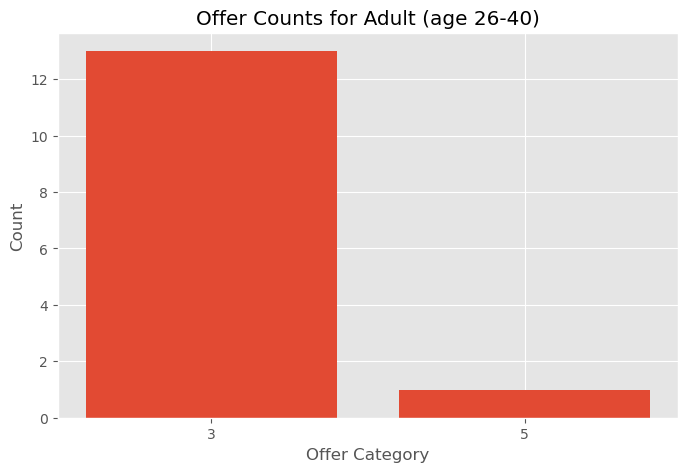

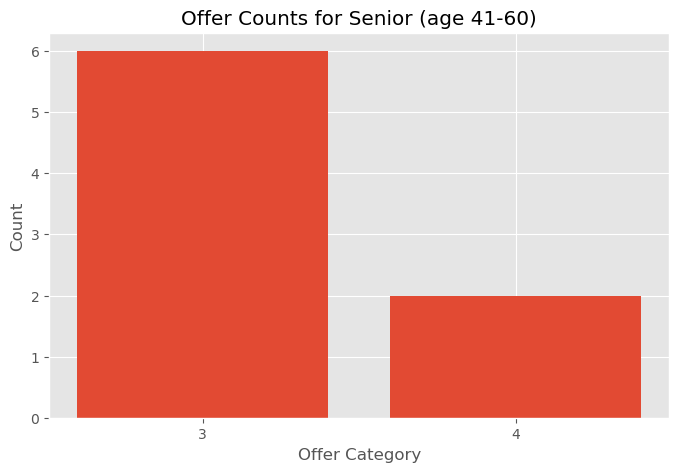

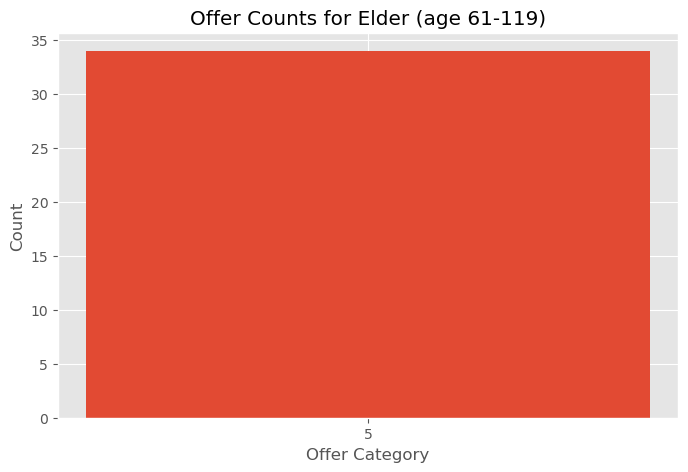

In [115]:
plt.figure(figsize=(8,5))
keys = list(youth_list.keys())
values = list(youth_list.values())
sorted_keys = sorted(keys)
sorted_values = [youth_list[k] for k in sorted_keys]
plt.bar([str(k) for k in sorted_keys], sorted_values)
plt.xlabel('Offer Category')
plt.ylabel('Count')
plt.title('Offer Counts for Youth (age 18-25)')
plt.show()

plt.figure(figsize=(8,5))
keys = list(adult_list.keys())
values = list(adult_list.values())
sorted_keys = sorted(keys)
sorted_values = [adult_list[k] for k in sorted_keys]
plt.bar([str(k) for k in sorted_keys], sorted_values)
plt.xlabel('Offer Category')
plt.ylabel('Count')
plt.title('Offer Counts for Adult (age 26-40)')
plt.show()

plt.figure(figsize=(8,5))
keys = list(senior_list.keys())
values = list(senior_list.values())
sorted_keys = sorted(keys)
sorted_values = [senior_list[k] for k in sorted_keys]
plt.bar([str(k) for k in sorted_keys], sorted_values)
plt.xlabel('Offer Category')
plt.ylabel('Count')
plt.title('Offer Counts for Senior (age 41-60)')
plt.show()

plt.figure(figsize=(8,5))
keys = list(elder_list.keys())
values = list(elder_list.values())
sorted_keys = sorted(keys)
sorted_values = [elder_list[k] for k in sorted_keys]
plt.bar([str(k) for k in sorted_keys], sorted_values)
plt.xlabel('Offer Category')
plt.ylabel('Count')
plt.title('Offer Counts for Elder (age 61-119)')
plt.show()